In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from google.colab import files

In [0]:
uploaded = files.upload()

Saving Boston.csv to Boston.csv


In [0]:
import io
bos = pd.read_csv(io.BytesIO(uploaded['Boston.csv']))

In [0]:
bos.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [0]:
## dependent variable and independent variable 
X = bos.drop(['medv'], axis = 1)
y = bos['medv']

In [0]:
X.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [0]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

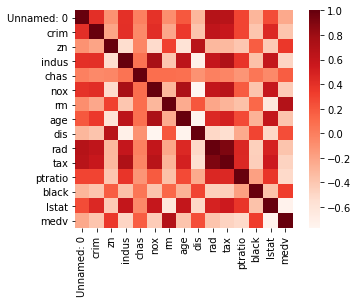

In [0]:
# code to plot correlation
# library to establish correlation
import seaborn as sns
# creating a correlation matrix 
correlations = bos.corr()
sns.heatmap(correlations,square = True, cmap = 'Reds')
plt.yticks()
plt.xticks()
plt.show()

In [0]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter

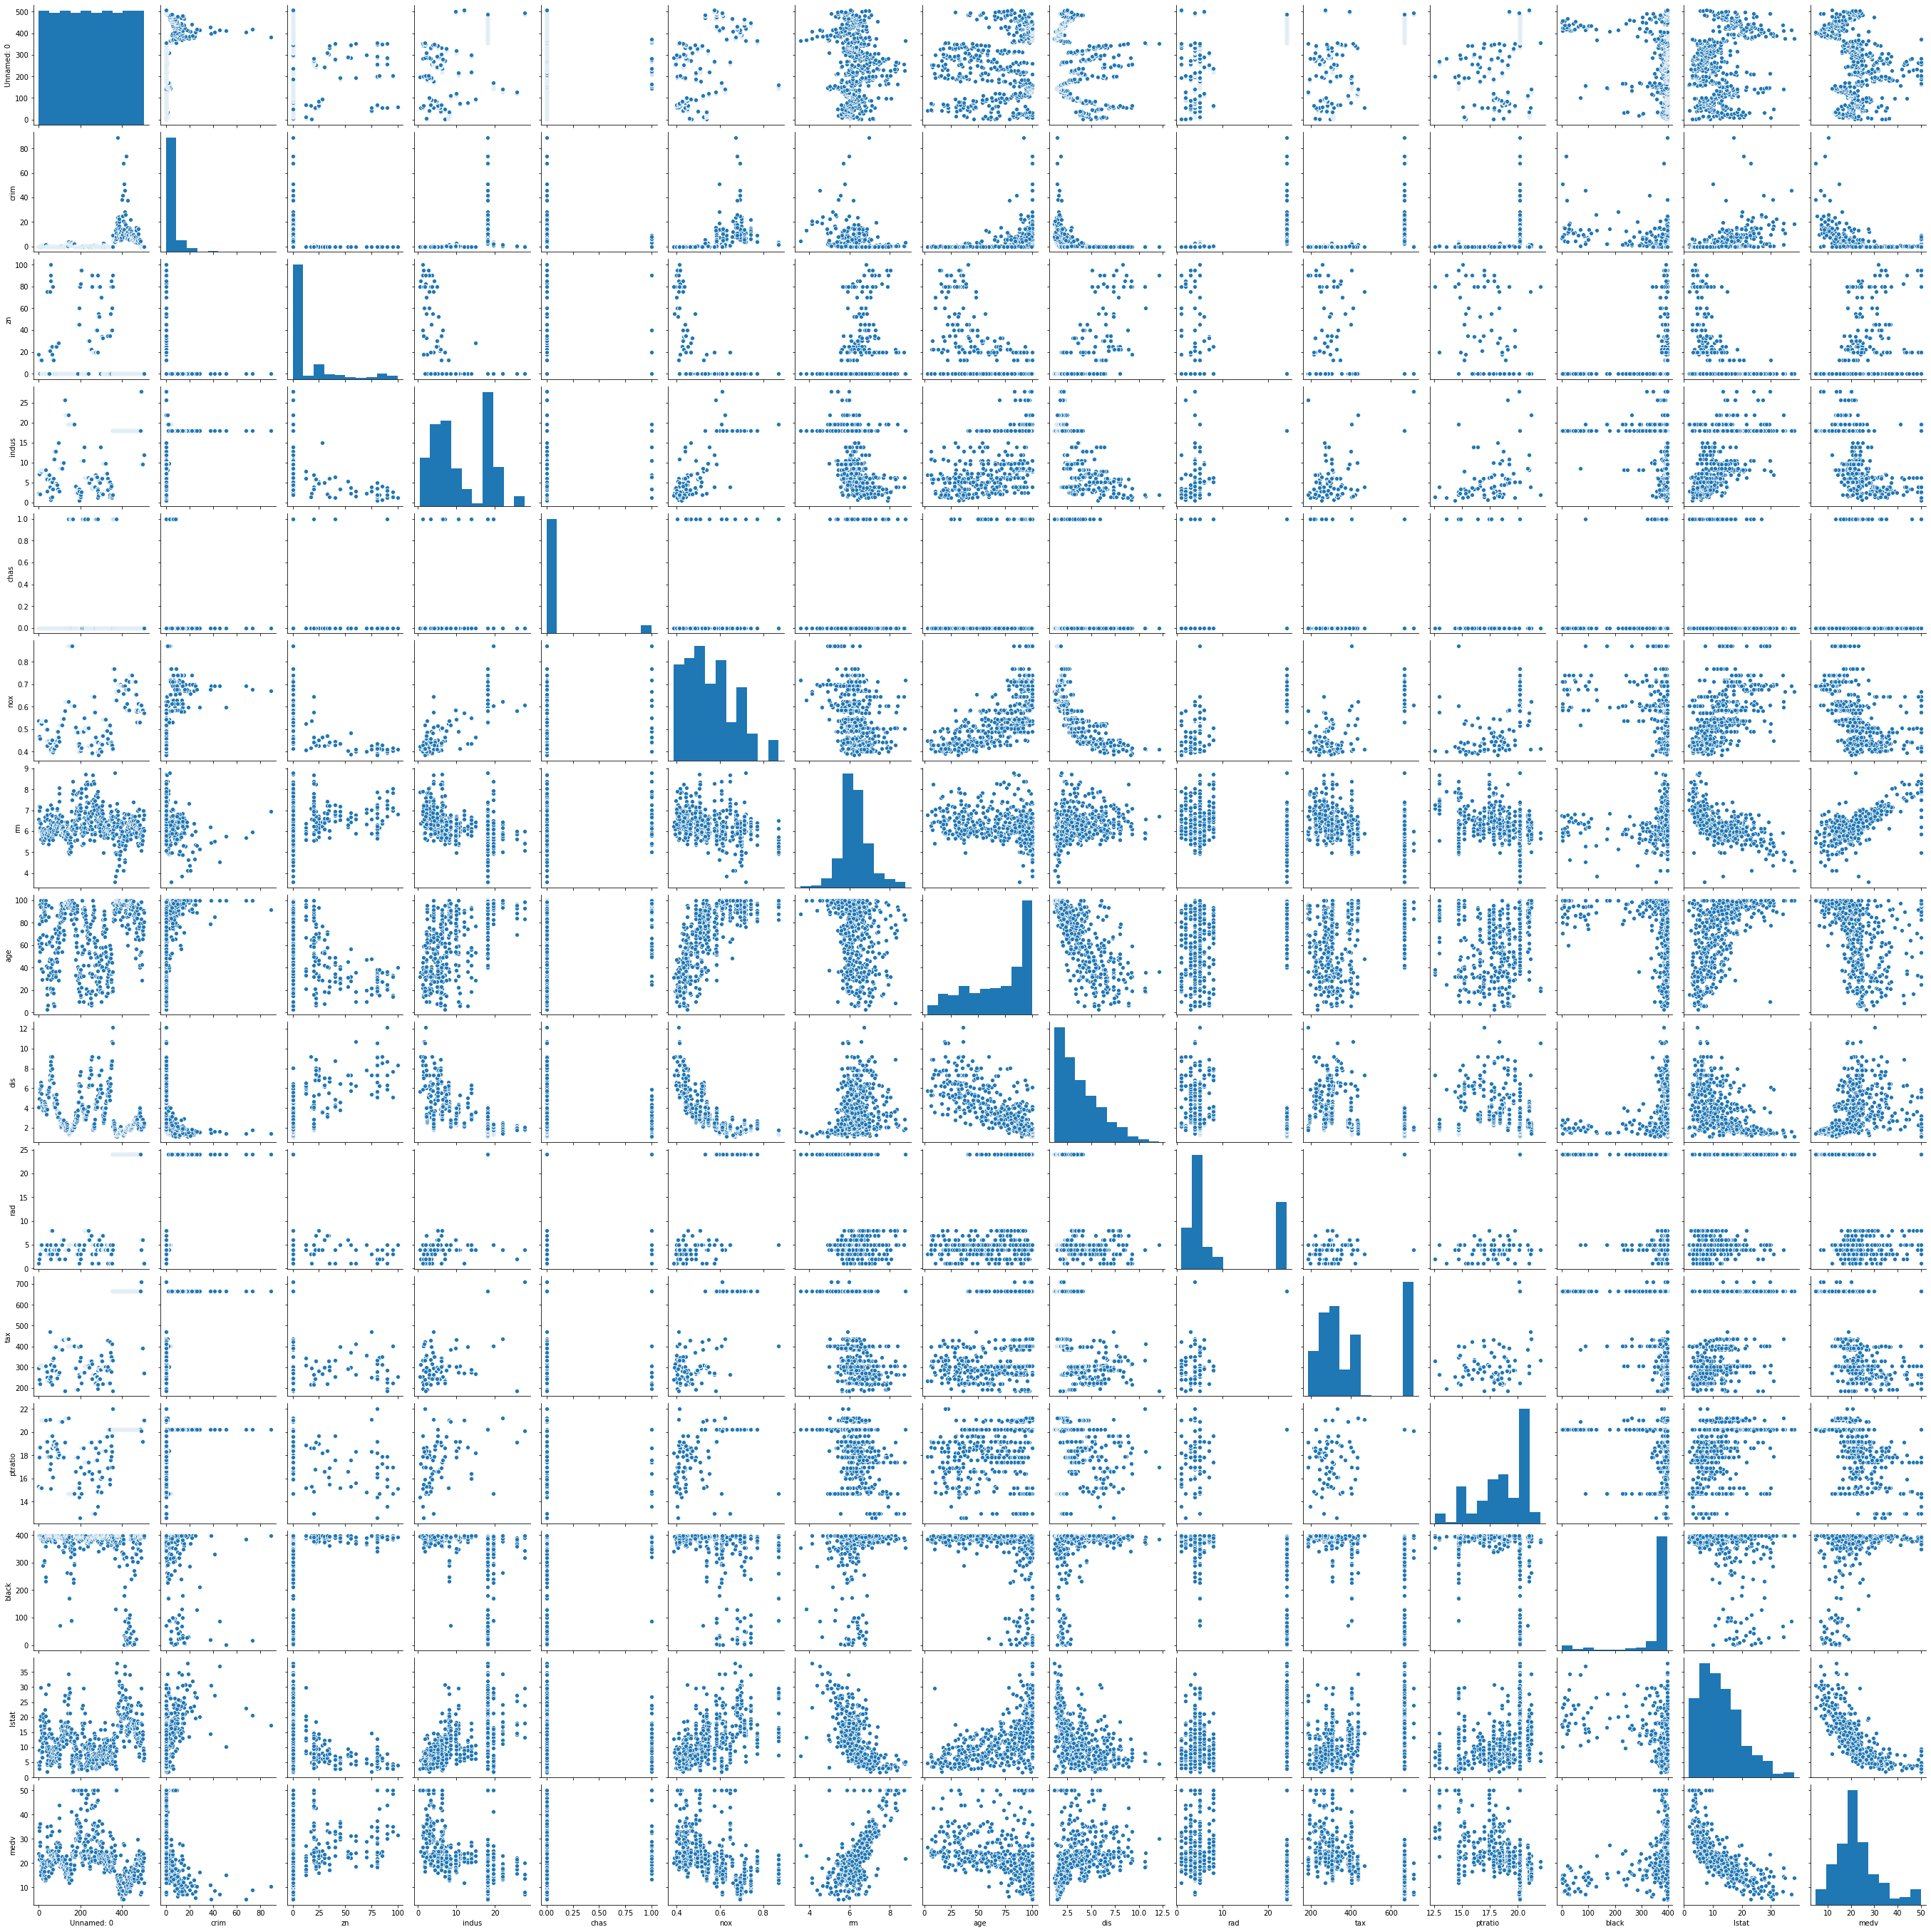

In [0]:
# Using pairplot to see correlation with the help of graph between each attribute 
# It can also be done using simple corr() command that will give us the value 
sns.pairplot(bos)

In [0]:
print (bos.corr())

            Unnamed: 0      crim        zn  ...     black     lstat      medv
Unnamed: 0    1.000000  0.407407 -0.103393  ... -0.295041  0.258465 -0.226604
crim          0.407407  1.000000 -0.200469  ... -0.385064  0.455621 -0.388305
zn           -0.103393 -0.200469  1.000000  ...  0.175520 -0.412995  0.360445
indus         0.399439  0.406583 -0.533828  ... -0.356977  0.603800 -0.483725
chas         -0.003759 -0.055892 -0.042697  ...  0.048788 -0.053929  0.175260
nox           0.398736  0.420972 -0.516604  ... -0.380051  0.590879 -0.427321
rm           -0.079971 -0.219247  0.311991  ...  0.128069 -0.613808  0.695360
age           0.203784  0.352734 -0.569537  ... -0.273534  0.602339 -0.376955
dis          -0.302211 -0.379670  0.664408  ...  0.291512 -0.496996  0.249929
rad           0.686002  0.625505 -0.311948  ... -0.444413  0.488676 -0.381626
tax           0.666626  0.582764 -0.314563  ... -0.441808  0.543993 -0.468536
ptratio       0.291074  0.289946 -0.391679  ... -0.177383  0.374

In [0]:
# to check the missing values 
bos.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [0]:
bos['rad'].unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24])

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [0]:
lr = LinearRegression()

In [0]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = lr.predict(X_test)

In [0]:
y_test.head(), y_pred[0:5]

(307    28.2
 343    23.9
 47     16.6
 67     22.0
 362    20.8
 Name: medv, dtype: float64,
 array([32.41733789, 27.79019385, 18.17770743, 21.81309598, 19.00330262]))

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
mean_squared_error(y_test,y_pred)

23.369625899561086

In [0]:
import statsmodels.api as sm 
X_constant = sm.add_constant(X)
lr = sm.OLS(y,X_constant).fit()
lr.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     100.6
Date:                Tue, 24 Mar 2020   Prob (F-statistic):          3.44e-134
Time:                        09:53:04   Log-Likelihood:                -1498.0
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     491   BIC:                             3089.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4614      5.101      7.148      0.000      26.439      46.484
Unnamed: 0    -0.0025      0.002     -1.215      0.225      -0.007       0.002
crim          -0.1088      0.033     -3.310      0.001      -0.173      -0.044
zn             0.0480      0.014      3.484      0.001       0.021       0.075
indus          0.0199      0.061      0.324      0.746      -0.101       0.141
chas           2.7052      0.861      3.141      0.002       1.013       4.398
nox          -17.5416      3.822     -4.589      0.000     -25.052     -10.031
rm             3.8392      0.418      9.175      0.000       3.017       4.661
age           -0.0019      0.013     -0.145      0.885      -0.028       0.024
dis           -1.4933      0.200     -7.471      0.000      -1.886      -1.101
rad            0.3249      0.068      4.771      0.000       0.191       0.459
tax           -0.0116      0.004     -3.046      0.002      -0.019      -0.004
ptratio       -0.9480      0.131     -7.246      0.000      -1.205      -0.691
black          0.0094      0.003      3.485      0.001       0.004       0.015
lstat         -0.5262      0.051    -10.377      0.000      -0.626      -0.427
==============================================================================
Omnibus:                      175.545   Durbin-Watson:                   1.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              760.925
Skew:                           1.502   Prob(JB):                    5.85e-166
Kurtosis:                       8.202   Cond. No.                     1.68e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**CHECKING ASSUMPTIONS OF LINEAR REGRESSION**

MULTI COLLINEARITY

In [0]:
#checking multi collinearity
# vif = 1/(1- R-squared)
vif = 1/(1-0.741)
print(vif)

3.861003861003861


In [0]:
# if the VIF is 5 or greater you should check VIF of each variable 

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X_constant.values, i) for i in range (X_constant.shape[1])]
vif['features'] = X_constant.columns

In [0]:
vif.round(1)

,VIF Factor,features
0,585.3,const
1,2.1,Unnamed: 0
2,1.8,crim
3,2.3,zn
4,4.0,indus
5,1.1,chas
6,4.4,nox
7,1.9,rm
8,3.2,age
9,4.0,dis


NORMALITY OF RESIDUALS

In [0]:
residual = y_test - y_pred 
print(residual)

307   -4.217338
343   -3.890194
47    -1.577707
67     0.186904
362    1.796697
         ...   
92    -6.489236
224    7.695461
110    0.913049
426   -7.216306
443   -2.246926
Name: medv, Length: 102, dtype: float64


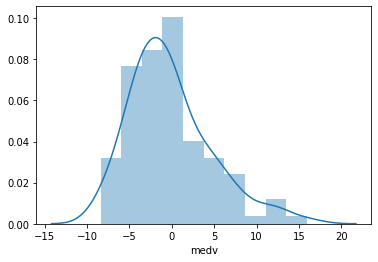

In [0]:
sns.distplot(residual)

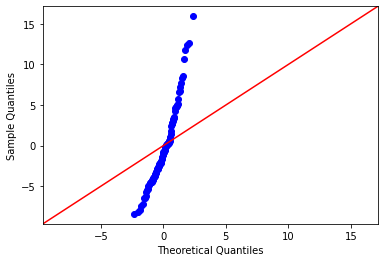

In [0]:
sm.qqplot(residual, line = '45')
plt.show()

the value of mean of residual should be very small(like 0.03,0.01..etc) or 0 this is still a bigger value which means the residuals are not normal 


In [0]:
np.mean(residual)

-0.1986272423565604

HOMOSCEDASTICITY 

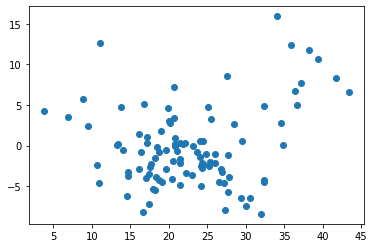

In [0]:
# it is nothing but scatter plot between y predicted value and residual
plt.scatter(y_pred, residual)
plt.show()

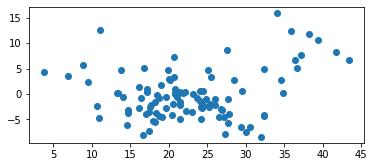

In [0]:
# another way but bit difficult 
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

Now Remove those variables which are not significant and test assumptions of LR


In [0]:
X = bos.drop(['age','indus'], axis = 1)

In [0]:
X.head()

,Unnamed: 0,crim,zn,chas,nox,rm,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,0,0.538,6.575,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,0,0.469,6.421,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,0,0.469,7.185,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,0,0.458,6.998,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,0,0.458,7.147,6.0622,3,222,18.7,396.90,5.33,36.2


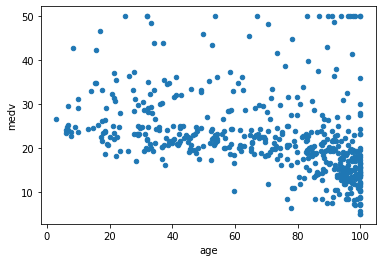

In [0]:
bos.plot(kind = 'scatter', x = 'age', y= 'medv' )

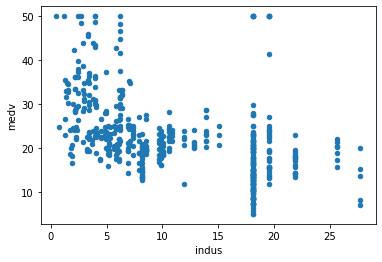

In [0]:
bos.plot(kind = 'scatter', x ='indus', y = 'medv')

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [0]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [0]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = lr.predict(X_test)

In [0]:
y_test.head(), y_pred[0:5]

(307    28.2
 343    23.9
 47     16.6
 67     22.0
 362    20.8
 Name: medv, dtype: float64, array([28.2, 23.9, 16.6, 22. , 20.8]))

In [0]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

6.548164227769865e-27

In [0]:
import statsmodels.api as sb
X_cons = sb.add_constant(X)
lr = sb.OLS(y,X_cons).fit()
lr.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.586e+28
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        07:42:10   Log-Likelihood:                 13792.
No. Observations:                 506   AIC:                        -2.756e+04
Df Residuals:                     492   BIC:                        -2.750e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.531e-14   4.01e-13     -0.063      0.950   -8.13e-13    7.62e-13
Unnamed: 0  1.076e-16   1.54e-16      0.696      0.487   -1.96e-16    4.11e-16
crim        8.288e-16    2.5e-15      0.332      0.740   -4.07e-15    5.73e-15
zn         -4.797e-15   1.04e-15     -4.624      0.000   -6.84e-15   -2.76e-15
chas        1.656e-14    6.5e-14      0.255      0.799   -1.11e-13    1.44e-13
nox        -4.574e-14   2.73e-13     -0.168      0.867   -5.81e-13     4.9e-13
rm          7.133e-15   3.32e-14      0.215      0.830   -5.81e-14    7.24e-14
dis         3.886e-16   1.49e-14      0.026      0.979   -2.88e-14    2.96e-14
rad        -9.853e-16   5.04e-15     -0.195      0.845   -1.09e-14    8.93e-15
tax        -6.098e-16    2.6e-16     -2.344      0.019   -1.12e-15   -9.87e-17
ptratio     6.523e-16   1.02e-14      0.064      0.949   -1.94e-14    2.08e-14
black      -4.773e-17   2.04e-16     -0.234      0.815   -4.48e-16    3.53e-16
lstat       2.706e-16      4e-15      0.068      0.946    -7.6e-15    8.14e-15
medv           1.0000   3.39e-15   2.95e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                       44.396   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.671
Skew:                           0.776   Prob(JB):                     2.22e-12
Kurtosis:                       3.371   Cond. No.                     1.72e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

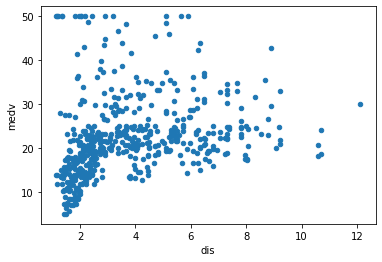

In [0]:
bos.plot(kind = 'scatter',x='dis',y='medv')

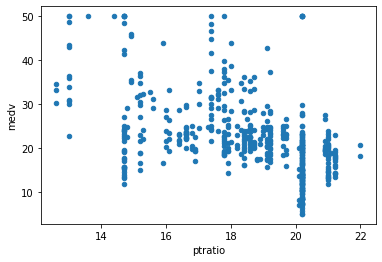

In [0]:
bos.plot(kind = 'scatter', x ='ptratio',y ='medv')

In [0]:
print(vif)

0.0
